## 확률밀도의 시각화


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

앞 절에서 확인하였던 데이터를 다시 생성해봅시다. 

In [2]:
x = np.linspace(-1,1, 100)
y = np.linspace(-1,1, 100)
xs, ys = np.meshgrid(x,y)
xs.shape, ys.shape
# %%
zs = np.sqrt(np.sin(xs**2) + np.cos(ys**2))

contour는 주어진 2차원 값을 이용하여 등고선을 표시하는 함수입니다. 여기서는 등고성의 형태, 색깔등을 정할 수 있습니다.

Text(0.5, 1.0, 'Main')

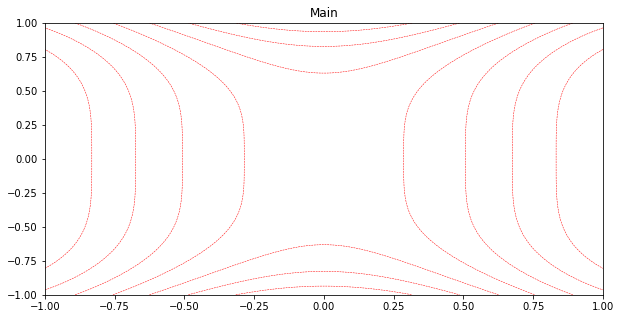

In [3]:
# %%
# 3-2-1
# colorbar의 사용용법을 확인해보면 figure에 적용하는 것임
# colorbar는 그래픽 객체를 받아야 함. (plot)
# contour 에 등고선과 눈금에 대한 값을  clable로 적용할 수 
# 왜 여기는 모든 옵션에 복수를 사용하는 것일까? (colors, linestyles)
fig, ax = plt.subplots(figsize = (10,5))
ax.contour(x,y,zs, colors ='red', linestyles = 'dashed',
                linewidths = 0.5)
ax.set_title("Main")

등고성이 잘 표시되어 있지만 등고선 값을 확인할 수 없어서 좀 심심한 그림입니다. 등고선에 직접 값을 표시할 수 있는 방법은 없을까요?

clabel을 이용할 수 있습니다. clabel은 contour의 등고선에 값을 입력해야 하므로 contour 함수로 부터 계산한 등고선의 값을 알아야 합니다. 아래 예를 살펴보면 contour 를 그리기 위해 처리한 결과인  ***c1*** 의 변수값을 저장한 후 그 값을 이용하여 clabel 함수를 실행함을 확인할 수 있습니다.

<a list of 14 text.Text objects>

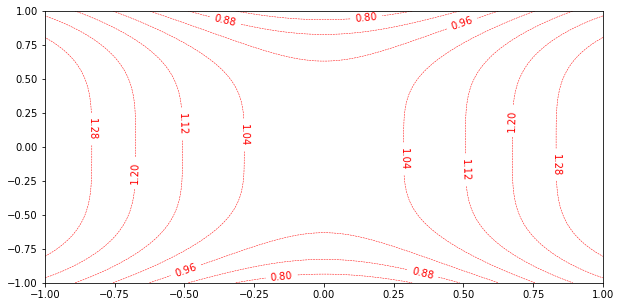

In [4]:
fig, ax = plt.subplots(figsize = (10,5))
c1 = ax.contour(x,y,zs, colors ='red', linestyles = 'dashed',
                linewidths = 0.5)
ax.clabel(c1)

contour 를 색상으로 표시하고 싶다면 어떻게 해야할까요? contour는 등고선만을 그려주는 함수이기 때문에 새로운 함수가 필요합니다. 바로 ***contourf*** 함수입니다.  이 함수의 이름은 filled contour 함수입니다. 

등고선을 그리고 색상을 면으로 표현하는 방법은 다음과 같습니다. 
- 등고선을 그리기
- filled contour 그리기

이것은 하나의 axes에 두개의 작업을 같이 수행함으로써 등고선이 표시된 색상 contour를 그릴 수 있음을 나타냅니다.

Text(0.5, 1.0, 'Main')

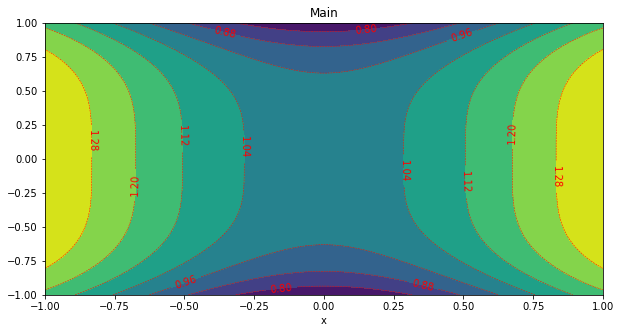

In [5]:
fig, ax = plt.subplots(figsize = (10,5))
c1 = ax.contour(x,y,zs, colors ='red', linestyles = 'dashed',
                linewidths = 0.5)
ax.clabel(c1)
ax.contourf(x,y, zs)
ax.set_xlabel("x")
ax.set_title("Main")

색상의 legend인 colorbar를 추가하는 방법은 역시 등고선에 숫자를 표시하는 방법과 유사합니다. coutourf의 결과값을 저장한 후 그 값을 이용하여 colorbar 함수에 입력으로 사용해야합니다. 

여기서 주의할 점은 colorbar 함수는 figure level에 적용된다는 것입니다. 왜냐하면 axex는 그림의 layout 자체에 대한 정보를 가지고 있지 않기 때문입니다. colorbar는 색상 팔레트를 표시하는 새로운 layout을 추가하는 것으로 figure level 에서 이루어져야 합니다. 

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
c1 = ax.contour(x,y,zs, colors ='red', linestyles = 'dashed',
                linewidths = 0.5)
ax.clabel(c1)
pc = ax.contourf(x,y, zs)
ax.set_xlabel("x")
ax.set_title("Main")
fig.colorbar(pc)

참고로 cmap을 지정하여 같은 그림을 그려보겠습니다. 아래에 다른 colormap을 적용해보세요.

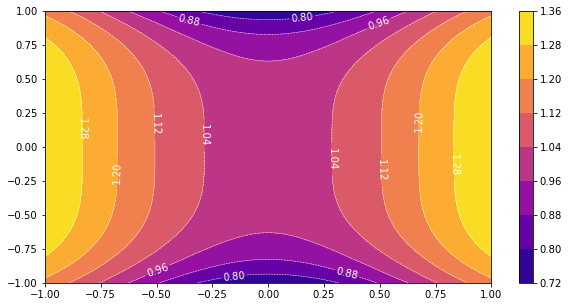

In [7]:
# colormap의 변형
# color map: 'RdBu_r', 'plasma', 'hot'
fig, ax = plt.subplots(figsize = (10,5))
c1 = ax.contour(x,y,zs, colors ='white', linestyles = 'dashed',
                linewidths = 0.5)
ax.clabel(c1)
pc = ax.contourf(x,y,zs, cmap = 'plasma' )
fig.colorbar(pc)

등고선 보다 좀 더 부드러운 표현을 할 수 있는 pcolormesh 함수를 소개합니다. 사용방법은 contourf 와 거의 같습니다. 

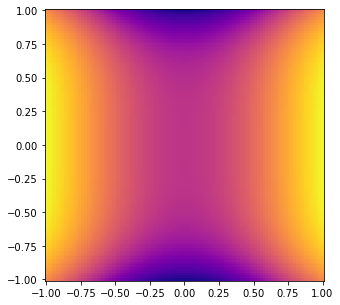

In [9]:
fig, ax = plt.subplots(figsize = (5,5))
ax.pcolormesh(x,y,zs, vmin = 0.72, vmax = 1.36, cmap = 'plasma')

<a list of 14 text.Text objects>

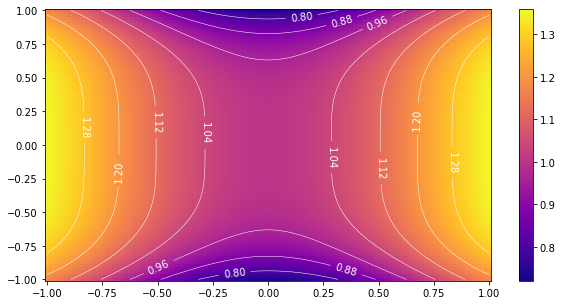

In [10]:
fig, ax = plt.subplots(figsize = (10,5))
c1 = ax.pcolormesh(x,y,zs, vmin = 0.72, vmax = 1.36, cmap = 'plasma')
fig.colorbar(c1)
c2 = ax.contour(x,y, zs, linewidths =0.5, colors = 'white')
ax.clabel(c2)

아래 예제는 점으로 표시한 밀도를 시각화하는 함수로 세 단계로 구성되어 있습니다.
- 밀도의 추정(kde2D): 2차원 점들을 이용하여 2차원 확률밀도함수를 추정하는 함수입니다. 2차원 히스토그램을 부드럽게 만들 것이라고 이해할 수 있습니다.
- pcolormesh를 이용한 시각화: 밀도함수의 추정값을 이용하여 색상을 채워넣기
- contour:

In [17]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins,y.min():y.max():ybins]
    xy_sample = np.concatenate([xx.reshape(-1,1),yy.reshape(-1,1)], 
                               axis = 1)
    xy_train  = np.concatenate([x.reshape(-1,1),y.reshape(-1,1)], 
                               axis = 1)

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

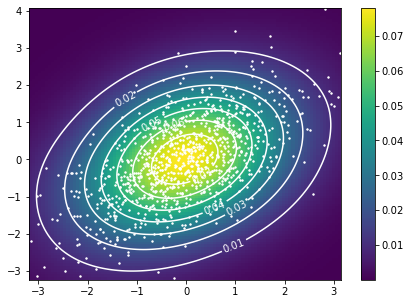

In [23]:
n = 1000
m1 = np.random.normal(size=n)
m2 = np.random.normal(scale=0.5, size=n)
x, y = m1 + m2, m1 - m2
xx, yy, zz = kde2D(x, y, 1.0)
fig, ax = plt.subplots(figsize = (7,5))
c1 = ax.pcolormesh(xx, yy, zz)
ax.scatter(x, y, s=2, facecolor='white')
c2 = ax.contour(xx, yy, zz, colors = 'white')
ax.clabel(c2)
fig.colorbar(c1)